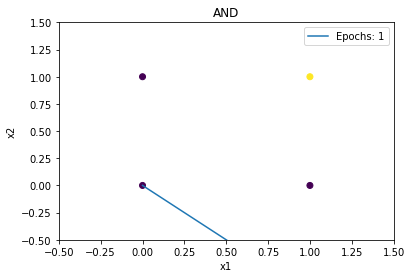

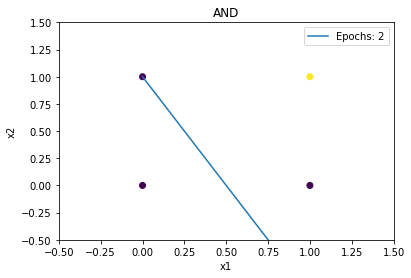

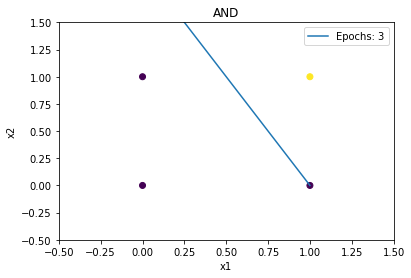

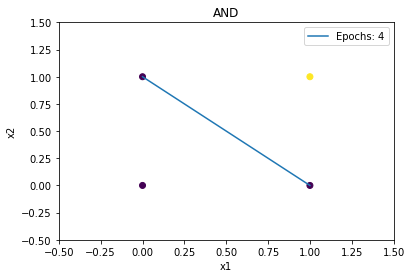

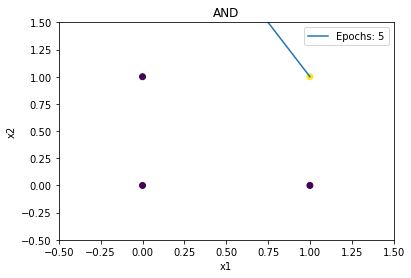

Number of updates for AND operation: 5


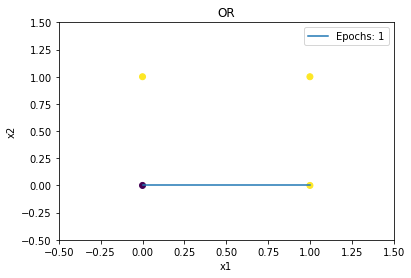

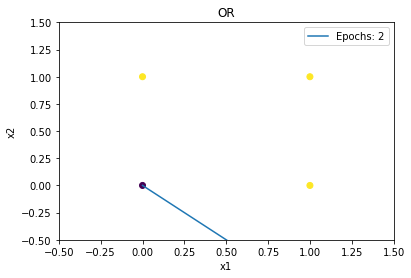

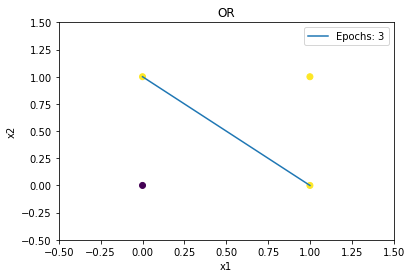

Number of updates for OR operation: 3


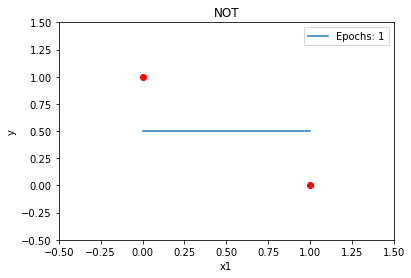

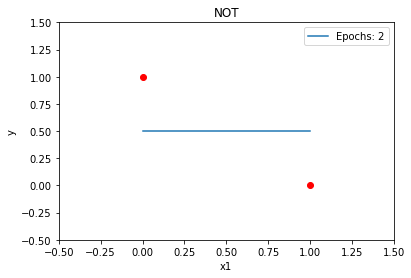

Number of updates for NOT operation: 2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def activation_step(x, w, b):
    return 1 if np.dot(x, w) + b >= 0 else 0

def AND(x1, x2):
    return 1 if x1 == 1 and x2 == 1 else 0

def OR(x1, x2):
    return 1 if x1 == 1 or x2 == 1 else 0

def NOT(x1):
    return 1 if x1 == 0 else 0

def PTA(operation, max_epochs=50):
    # Define the input and output data
    if operation == 'AND':
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([0, 0, 0, 1])
    elif operation == 'OR':
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([0, 1, 1, 1])
    elif operation == 'NOT':
        X = np.array([[0], [1]])
        y = np.array([1, 0])

    # Initialize the weights and bias
    w = np.zeros(X.shape[1])
    b = 0

    # Store the number of updates at each epoch
    updates = []
    for epoch in range(max_epochs):
        update = 0
        for i, x in enumerate(X):
            y_pred = activation_step(x, w, b)
            if y[i] != y_pred:
                # print(y[i]-y_pred)
                w += (y[i] - y_pred) * x
                b += (y[i] - y_pred)
                update += 1
        updates.append(update)
        if update == 0:
            break

        # Plot the decision boundary
        if X.shape[1] == 2:
            plt.scatter(X[:,0], X[:,1], c=y)
            x_vals = np.array([np.min(X[:,0]), np.max(X[:,0])])
            y_vals = - (w[0] * x_vals + b) / w[1]
            plt.plot(x_vals, y_vals, label=f'Epochs: {epoch + 1}')
            plt.xlim([-0.5, 1.5])
            plt.ylim([-0.5, 1.5])
            plt.xlabel('x1')
            plt.ylabel('x2')
            plt.title(operation)
            plt.legend()
            plt.show()

        if X.shape[1] == 1:
            plt.scatter(X, y, c='r')
            x_vals = np.array([np.min(X), np.max(X)])
            y_vals = np.ones(2) * 0.5
            plt.plot(x_vals, y_vals, label=f'Epochs: {epoch + 1}')
            plt.xlim([-0.5, 1.5])
            plt.ylim([-0.5, 1.5])
            plt.xlabel('x1')
            plt.ylabel('y')
            plt.title(operation)
            plt.legend()
            plt.show()
    
    return epoch , updates

# AND operation
epochs, updates = PTA('AND')
print(f'Number of updates for AND operation: {epochs}')

# OR operation
epochs, updates = PTA('OR')
print(f'Number of updates for OR operation: {epochs}')

# NOT operation
epochs, updates = PTA('NOT')
print(f'Number of updates for NOT operation: {epochs}')


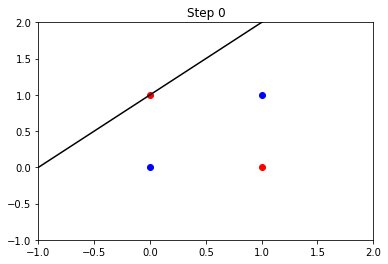

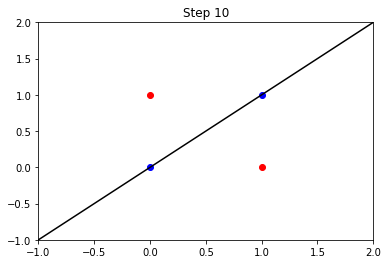

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def heaviside(x):
    return 1 * (x >= 0)

def pta(X, y, w, b, lr):
    for i in range(len(X)):
        x = X[i].reshape(2, 1)
        z = np.dot(w.T, x) + b
        a = heaviside(z)
        error = y[i] - a
        w += lr * error * x
        b += lr * error
    return w, b

def plot_decision_boundary(w, b):
    x = np.linspace(-1, 2, 100)
    y = -(w[0] * x + b[0])
    plt.plot(x, y, 'k-')

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

w = np.zeros((2, 1))
b = np.zeros((1, 1))

for i in range(20):
    w, b = pta(X, y, w, b, 1)
    # print(w,b)
    if i % 10 == 0:
        plot_decision_boundary(w, b)
        plt.scatter(X[y == 0, 0], X[y == 0, 1], c='b')
        plt.scatter(X[y == 1, 0], X[y == 1, 1], c='r')
        plt.title("Step %d" % i)
        plt.xlim(-1, 2)
        plt.ylim(-1, 2)
        plt.show()
